<a href="https://colab.research.google.com/github/yesalgado/Archivos_CSV/blob/main/Cuadernos_de_trabajo/UNI_Tarea_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

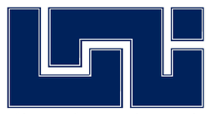

</center>

<h1><b>
Dirección de Estudios de Posgrado y Educación Continua
<h2><b>
Analítica Predictiva y Machine Learning con R, Python y Databricks

[UNI-DEPEC](https://posgrado.uni.edu.ni)

Tellez Salgado, Yesner Alexander
~~~Python
Apellidos, y Nombres
~~~

# **Tarea Modelos Supervisados**

## **Modelo de Clasificación / Supervisión**



## Carga de librerías necesarias

In [ ]:
import pandas as pd #para la creación del dataframe y limpieza de los datos
import sklearn #para los algoritmos de aprendizaje automático
import sklearn.metrics as metrics #para la medición de los algoritmos
import matplotlib.pyplot as plt #librería gráfica básica
import pickle #para grabar y recuperar los modelos entrenados
import os

## **Ingeniería de las características de los Datos**

### Extracción de Datos - Creación del DataFrame

In [ ]:
url = "https://raw.githubusercontent.com/yesalgado/Archivos_CSV/main/"

In [ ]:
archivo = "weatherAUS.csv"

In [ ]:
PredRainTime = pd.read_csv(url+archivo) #los datos están separados por comas
PredRainTime #vista del dataframe




,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Context
Predict next-day rain by training classification models on the target variable RainTomorrow.

Dataframe have 23 columns.

Content
This dataset contains about 10 years of daily weather observations from many locations across Australia.

Link: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

**RainTomorrow is the target variable to predict**. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

### Selección de características


In [ ]:
PredRainTime.info() #visualizacion de los tipos de datos del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

###Verificación de datos nulos en df

In [ ]:
PredRainTime.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

###Eliminando columnas innecesarias

In [ ]:
PredRainTime.drop(["Rainfall","Evaporation","Sunshine","WindGustDir","WindGustSpeed","WindDir9am",
         "WindDir3pm","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm","RainToday","Date","Location"], axis=1, inplace=True)

In [ ]:
PredRainTime

,MinTemp,MaxTemp,RainTomorrow
0,13.4,22.9,No
1,7.4,25.1,No
2,12.9,25.7,No
3,9.2,28.0,No
4,17.5,32.3,No
...,...,...,...
145455,2.8,23.4,No
145456,3.6,25.3,No
145457,5.4,26.9,No
145458,7.8,27.0,No


###Eliminando NaN

In [ ]:
PredRainTime.dropna(how="any", inplace=True)
PredRainTime.head()

,MinTemp,MaxTemp,RainTomorrow
0,13.4,22.9,No
1,7.4,25.1,No
2,12.9,25.7,No
3,9.2,28.0,No
4,17.5,32.3,No


In [ ]:
PredRainTime.isnull().sum()

MinTemp         0
MaxTemp         0
RainTomorrow    0
dtype: int64

Podemos constatar que no hay valores nulos, ya que todas las columnas tienen la misma cantidad de datos, pero lo que no podemos constatar es si hay valores duplicados...

## División del dataframe

Primero se divide el dataframe en variable objetivo  y  con la columna que contiene los datos etiquetados por un lado, y en vector de entrada de los datos  X=  con las variables restantes (variables independientes).

In [ ]:
y = PredRainTime["RainTomorrow"] #se define la variable objetivo
X = PredRainTime.drop(columns=["RainTomorrow"]) #se elimina la variable objetivo del vector de entrada

In [ ]:
y #visualizando la variable objetivo

0         No
1         No
2         No
3         No
4         No
          ..
145454    No
145455    No
145456    No
145457    No
145458    No
Name: RainTomorrow, Length: 141322, dtype: object

In [ ]:
X #visualizando el vector de entrada

,MinTemp,MaxTemp
0,13.4,22.9
1,7.4,25.1
2,12.9,25.7
3,9.2,28.0
4,17.5,32.3
...,...,...
145454,3.5,21.8
145455,2.8,23.4
145456,3.6,25.3
145457,5.4,26.9


Ahora se divide la variable objetivo  y  en un conjunto de datos de entrenamiento (train) y prueba (test). Lo mismo se realiza para el vector de entrada de los datos  X .

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

La proporcion es 75% para entrenamiento y 25% para prueba

In [ ]:
X_train.shape

(105991, 2)

De las 141322 observaciones del vector de entrada de datos, 105991 observaciones son de entrenamiento

In [ ]:
X_test.shape

(35331, 2)

De las 141322 observaciones del vector de entrada de datos, 35331 observaciones son de prueba

In [ ]:
y_train.shape

(105991,)

De las 141322 observaciones de la variable objetivo, 105991 observaciones son de entrenamiento

In [ ]:
y_test.shape

(35331,)

De las 141322 observaciones de la variable objetivo, 35331 observaciones son de prueba

## Escala del vector de entrada

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
normalizacion = StandardScaler()

In [ ]:
X_train = normalizacion.fit_transform(X_train)

In [ ]:
X_test = normalizacion.transform(X_test)

## Algoritmo Árbol de Decisión

In [ ]:
from sklearn import tree

In [ ]:
ad = sklearn.tree.DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=2)

In [ ]:
ad.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=100)

In [ ]:
y_pred_ad = ad.predict(X_test)

In [ ]:
mc = metrics.confusion_matrix(y_test, y_pred_ad)

In [ ]:
print(mc)

[[27398     0]
 [ 7933     0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


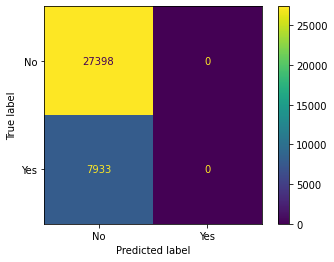

In [ ]:
metrics.plot_confusion_matrix(ad,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


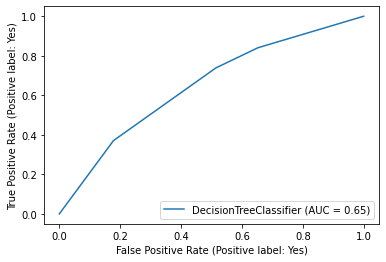

In [ ]:
metrics.plot_roc_curve(ad, X_test, y_test)

In [ ]:
reporte = metrics.classification_report(y_test, y_pred_ad)
print(reporte)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          No       0.78      1.00      0.87     27398
         Yes       0.00      0.00      0.00      7933

    accuracy                           0.78     35331
   macro avg       0.39      0.50      0.44     35331
weighted avg       0.60      0.78      0.68     35331



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


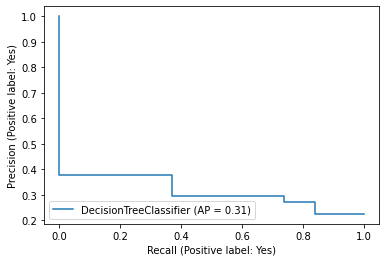

In [ ]:
metrics.plot_precision_recall_curve(ad,X_test,y_test)

### Guardando el modelo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = os.getcwd() + "/drive/MyDrive/Modelos/modelo_arbol_decision.pkl"

In [ ]:
file = open(path, "wb")
pickle.dump(ad, file)

### Leyendo el modelo

In [ ]:
file = open(path, "rb")
modelo_ad = pickle.load(file)

### Visualización Árbol de Decisión

In [ ]:
variables = ["MinTemp","MaxTemp"]
RainTomorrow = ["No","Si"]

[Text(223.2, 362.4, 'MaxTemp <= -0.472\nentropy = 0.767\nsamples = 105991\nvalue = [82263, 23728]\nclass = No'),
 Text(111.6, 217.44, 'MinTemp <= -1.003\nentropy = 0.885\nsamples = 37451\nvalue = [26093, 11358]\nclass = No'),
 Text(55.8, 72.47999999999996, 'entropy = 0.67\nsamples = 13965\nvalue = [11516, 2449]\nclass = No'),
 Text(167.39999999999998, 72.47999999999996, 'entropy = 0.958\nsamples = 23486\nvalue = [14577, 8909]\nclass = No'),
 Text(334.79999999999995, 217.44, 'MinTemp <= 0.387\nentropy = 0.681\nsamples = 68540\nvalue = [56170, 12370]\nclass = No'),
 Text(279.0, 72.47999999999996, 'entropy = 0.506\nsamples = 32093\nvalue = [28501, 3592]\nclass = No'),
 Text(390.59999999999997, 72.47999999999996, 'entropy = 0.796\nsamples = 36447\nvalue = [27669, 8778]\nclass = No')]

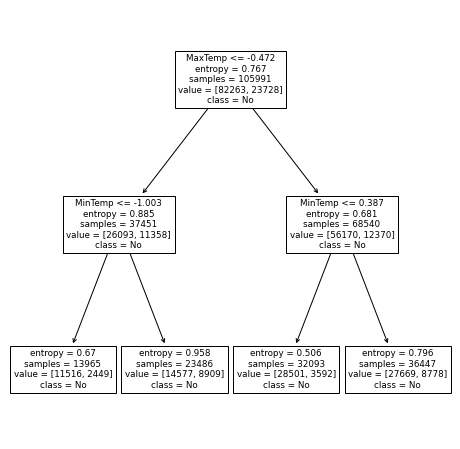

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
tree.plot_tree(modelo_ad, feature_names = variables, class_names= RainTomorrow, ax=ax)

### Predicción

In [ ]:
prediccion_ad = modelo_ad.predict([[13.9,24.9],[13.4,30.4],[7.4,25.1]])

In [ ]:
print(prediccion_ad)

['No' 'No' 'No']


In [ ]:
X_test

array([[ 0.50373279,  1.4900303 ],
       [-0.74499223, -1.39289634],
       [ 0.19155154, -0.85850019],
       ...,
       [-0.4640291 ,  0.02747239],
       [ 1.29979499,  0.81500357],
       [-0.05819347,  0.02747239]])

In [ ]:
prediccion_ad_2 = modelo_ad.predict(X_test)

In [ ]:
print(prediccion_ad_2)

['No' 'No' 'No' ... 'No' 'No' 'No']


# **Conclusiones**


De acuerdo a la data analizada, hemos podido predecir que existe una alta probabilidad de que no llueva al día siguiente en Australia. Según nuestra matriz de confusión obtuvimos un 77.5% de positivos que nos indican que no va a llover.